### Implement a naive bayes classifier

The implementation of naive bayes model is left blank in following function.
Make your own [classifier](#MyModel).

**Reference**
* [youtube video](https://www.youtube.com/watch?v=r1in0YNetG8)
* [How To Implement Naive Bayes From Scratch in Python](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

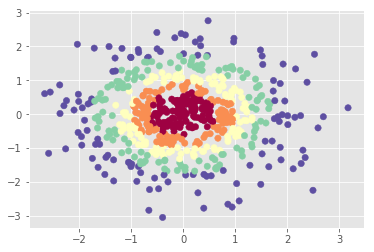

In [112]:
# Generate dataset from sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.style.use('ggplot') #makes plots look pretty

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_gaussian_quantiles(n_samples=600, n_classes=5)

# split training and testing data
train_x = X[:500]
train_y = y[:500]
test_x = X[500:]
test_y = y[500:]

# plot the training data distribution
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


In [100]:
# Plot function
# note: 
#   The implementation of model.predict will be used here.
#   Make sure your predict function takes input and input
#   properly.
#   You should not modify the code here.

def plot_decision_boundary(model,X,y):
    padding=0.15
    res=0.01
    
    #max and min values of x and y of the dataset
    x_min,x_max=X[:,0].min(), X[:,0].max()
    y_min,y_max=X[:,1].min(), X[:,1].max()
    
    #range of x's and y's
    x_range=x_max-x_min
    y_range=y_max-y_min
    
    #add padding to the ranges
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    #create a meshgrid of points with the above ranges
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    #use model to predict class at each point on the grid
    #ravel turns the 2d arrays into vectors
    #c_ concatenates the vectors to create one long vector on which to perform prediction
    #finally the vector of prediction is reshaped to the original data shape.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    #plot the contours on the grid
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    #plot the original data and labels
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

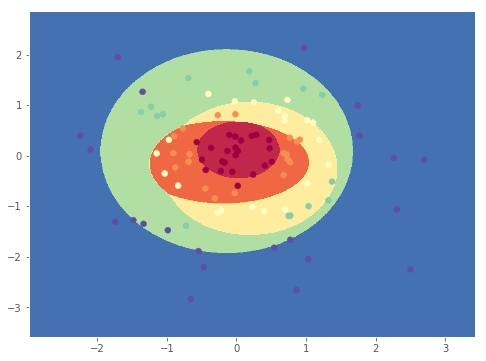

In [111]:
# Mimic the usage of GaussianNB class in sklearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)
plot_decision_boundary(gnb, test_x, test_y)

<a id="MyModel"></a>

In [ ]:
# All you need to implement is in this cell
class MyGaussianNBModel(object):
    def __init__(self):
        pass
    
    def split_dataset(self, x):
        
        # Seperate x by their corresponding label(y). In our case, there are 5 classes
        # in our dataset. The output of split_dataset should be a dictionary with 5 key
        # and value pairs:
        # {
        #    0: [[0.1, 0.5], [0.7, 0.05], ....],
        #    1: [data 1 with label1, data 2 with label2, ....],
        #
        #    ....
        # }
        
        pass #! remove pass and implement your own code
    
    def compute_gaussian_params(data):
        
        # input: all 2 dimensional data with the same label.
        # output: 
        # Parameters represent each gaussian shape (mean, variance) in each feature.
        # In our case, the output list should have two tuples
        # Ex: [(f1 mean, f1 var), (f2 mean, f2 var)]
        pass
    
    def fit(self, X, y):
        
        seperated_by_class = self.split_dataset(x)
        
        self.gaussian_params = {}
        
        for label, data in seperated_by_class.iteritems():
            self.gaussian_params[label] = compute_gaussian_params(data)
        
        # Calculate Gaussian distribution parameter of each feature in each class
        #
        # for example:
        #
        # self.gaussian_params = {
        # ------------------------------------------
        #    class : [ fea1(mean, var), fea(mean, var)]
        # ------------------------------------------
        #    0     : [(0.5, 0.28), (0.6, 0.08)],
        #    1     : [(0.3, 0.04), (0.7, 0.14)],
        #    ....
        # }
    
    def calculate_prob(self, x, cls):
        # Use gaussian likelihood function and self.gaussian_params to compute probability with mean and variance
        # output is a float
        pass
    
    def predict(self, x):
        
        # Just share the same interface as sklearn model.
        # x is like [[0.12, 1.5], [0.56, 3.2], ....]
        #                /^\          /^\
        #             testing 1     testing 2
        #
        # hint: use self.gaussian_params
        labels = []
        for data in x:
            class_prob = []
            for i in range(5): # n_class = 5
                class_prob.append(calculate_prob(data))
            labels.append(np.argmax(class_prob))
        return labels
        
    

In [ ]:
# Make the cell work perfectly, and output a plot
my_gnb = MyGaussianNBModel()
my_gnb.fit(train_x, train_y)
plot_decision_boundary(my_gnb, test_x, test_y)